In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.datasets import mnist 

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

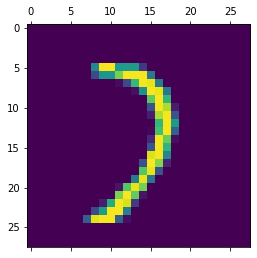

In [34]:
plt.matshow(x_train[140])

In [35]:
y_train[140]

7

In [15]:
x_train=x_train/255
x_test=x_test/255

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

In [17]:
model=Sequential()

In [19]:
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(200,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [23]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2321 - accuracy: 0.9333
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0982 - accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0661 - accuracy: 0.9791
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0482 - accuracy: 0.9850
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0354 - accuracy: 0.9883


In [25]:
y_predict=model.predict(x_test)

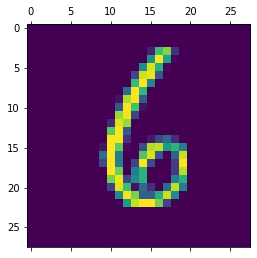

In [36]:
plt.matshow(x_test[140])

In [37]:
y_predict[140]

array([1.6759563e-05, 2.7237602e-06, 1.2880724e-05, 4.1657157e-07,
       6.5137749e-05, 1.3065580e-04, 9.9969518e-01, 4.4842139e-07,
       7.5432668e-05, 5.2225374e-07], dtype=float32)

In [38]:
np.argmax(y_predict[140])

6

In [39]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9791


[0.07389464974403381, 0.9790999889373779]

In [48]:
y_pred_labels=[np.argmax(1) for i in y_predict]

In [49]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred_labels)

In [50]:
print(conf_mat)

[[ 980    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0    0    0]
 [1028    0    0    0    0    0    0    0    0    0]
 [ 974    0    0    0    0    0    0    0    0    0]
 [1009    0    0    0    0    0    0    0    0    0]]


Text(0.5, 42.0, 'predicted labels')

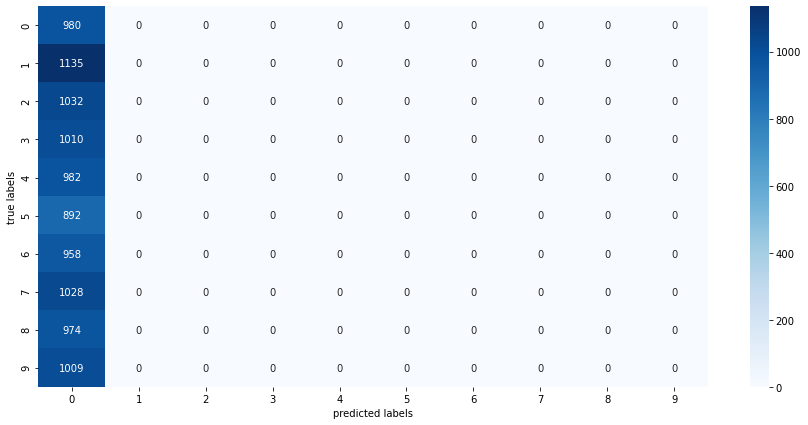

In [51]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('true labels')
plt.xlabel('predicted labels')